## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## EDA

In [2]:
df = pd.read_csv("WMT.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,22.791668,23.000000,21.833332,22.270832,14.469358,25109700
1,1/4/2000,21.833332,21.937500,21.395832,21.437500,13.927947,20235300
2,1/5/2000,21.291668,21.458332,20.729168,21.000000,13.643703,21056100
3,1/6/2000,21.000000,21.520832,20.895832,21.229168,13.792585,19633500
4,1/7/2000,21.500000,22.979168,21.500000,22.833332,14.834813,23930700
5,1/10/2000,22.416668,22.500000,21.875000,22.416668,14.564112,20142900
6,1/11/2000,22.354168,22.583332,21.875000,22.083332,14.347544,14829900
7,1/12/2000,22.062500,22.250000,21.687500,21.687500,14.090372,12255000
8,1/13/2000,22.000000,22.041668,21.666668,21.708332,14.103909,15063000
9,1/14/2000,21.333332,21.979168,21.333332,21.500000,13.968553,18936600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6118 non-null   object 
 1   Open       6118 non-null   float64
 2   High       6118 non-null   float64
 3   Low        6118 non-null   float64
 4   Close      6118 non-null   float64
 5   Adj Close  6118 non-null   float64
 6   Volume     6118 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 334.7+ KB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6118 entries, 0 to 6117
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6118 non-null   datetime64[ns]
 1   Open       6118 non-null   float64       
 2   High       6118 non-null   float64       
 3   Low        6118 non-null   float64       
 4   Close      6118 non-null   float64       
 5   Adj Close  6118 non-null   float64       
 6   Volume     6118 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 334.7 KB


In [6]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Filling Missing Rows

In [7]:
df.set_index('Date', inplace = True, drop = True)
df = df.resample('D').interpolate(method = 'time')
df.reset_index(inplace = True)
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,22.791668,23.000000,21.833332,22.270832,14.469358,25109700.0
1,2000-01-04,21.833332,21.937500,21.395832,21.437500,13.927947,20235300.0
2,2000-01-05,21.291668,21.458332,20.729168,21.000000,13.643703,21056100.0
3,2000-01-06,21.000000,21.520832,20.895832,21.229168,13.792585,19633500.0
4,2000-01-07,21.500000,22.979168,21.500000,22.833332,14.834813,23930700.0
5,2000-01-08,21.805556,22.819445,21.625000,22.694444,14.744579,22668100.0
6,2000-01-09,22.111112,22.659723,21.750000,22.555556,14.654346,21405500.0
7,2000-01-10,22.416668,22.500000,21.875000,22.416668,14.564112,20142900.0
8,2000-01-11,22.354168,22.583332,21.875000,22.083332,14.347544,14829900.0
9,2000-01-12,22.062500,22.250000,21.687500,21.687500,14.090372,12255000.0


## Plotting Graphs

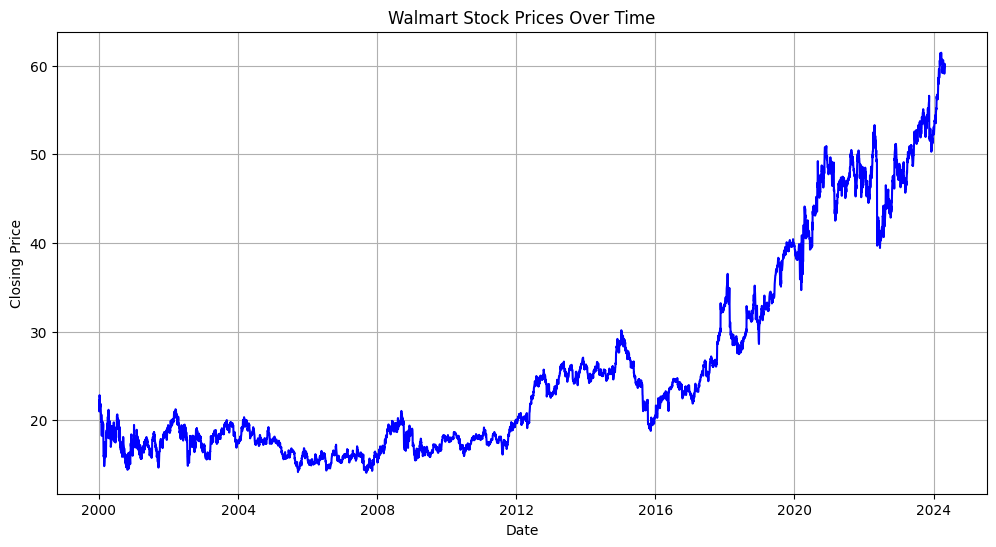

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Walmart Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

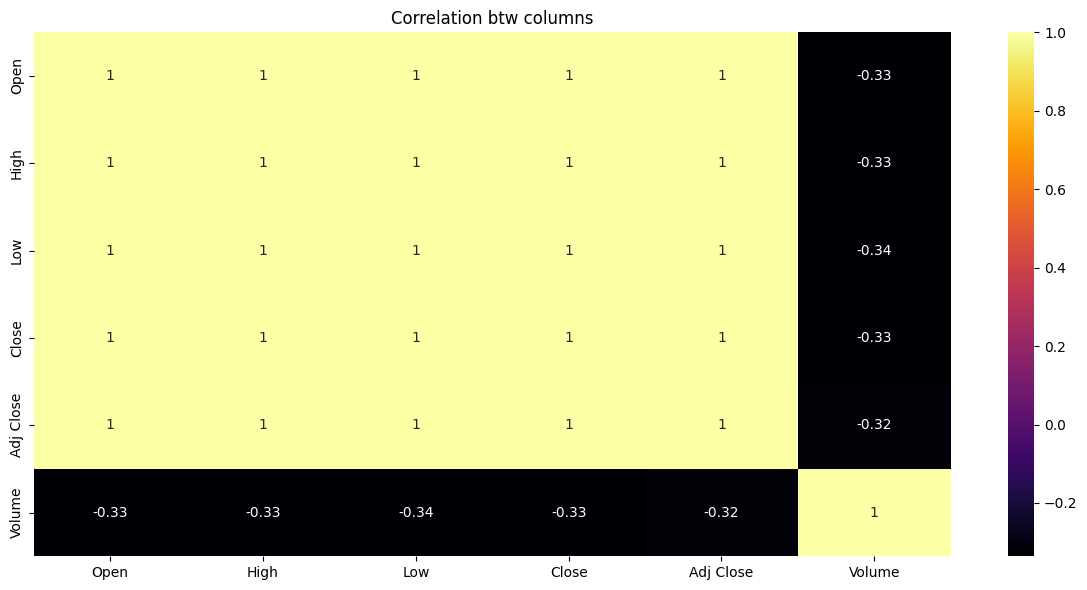

In [9]:
numeric_df = df.drop(columns = 'Date')
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="inferno")
plt.title('Correlation btw columns')
plt.tight_layout()
plt.show()

## Trying Models

In [10]:
X = df.drop(columns = ['Date', 'Close'])
y = df['Close']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [12]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

In [13]:
r2_lr = r2_score(y_pred_lr, y_test)
r2_lr

0.9998766521280698

### Random Forest

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
r2_rf = r2_score(y_pred_rf, y_test)
r2_rf

0.9998989573863181